In [1]:
#%matplotlib notebook
#%matplotlib inline
    
import sys,os
sys.path.append('./pyptychostem/') # path to pyptychostem
import matplotlib.pyplot as plt

import multiprocessing
import typing
import numpy as np
#import cupy as cp
from STEM4D import *


In [2]:
#path to  parameters file
#parfile ='/Users/test/trondhiem/MAPbI3_dose_100/parameters.txt'
parfile ='parameters.txt'

load data and using interactive plot

In [3]:
data_4D = Data4D(parfile)

['file', 'data_BF.npy']
['method', 'ssb']
['aperture', '0.013']
['stepsize', '0.3']
['voltage', '200.0']
['rotation', '0.0']
['threshold', '0.3']
['workers', '30']
/Users/test/clean_copy_most_recent/


In [4]:
data_4D = Data4D(parfile)
#data_4D.center_ronchigrams()
data_4D.estimate_aperture_size()
%matplotlib widget 
s = data_4D.plot_4D()

['file', 'data_BF.npy']
['method', 'ssb']
['aperture', '0.013']
['stepsize', '0.3']
['voltage', '200.0']
['rotation', '0.0']
['threshold', '0.3']
['workers', '30']
/Users/test/clean_copy_most_recent/


In [5]:
data_4D.data_4D.shape

(256, 256, 64, 64)

In [6]:
Ronchi_mean=np.mean(data_4D.data_4D,(0,1))

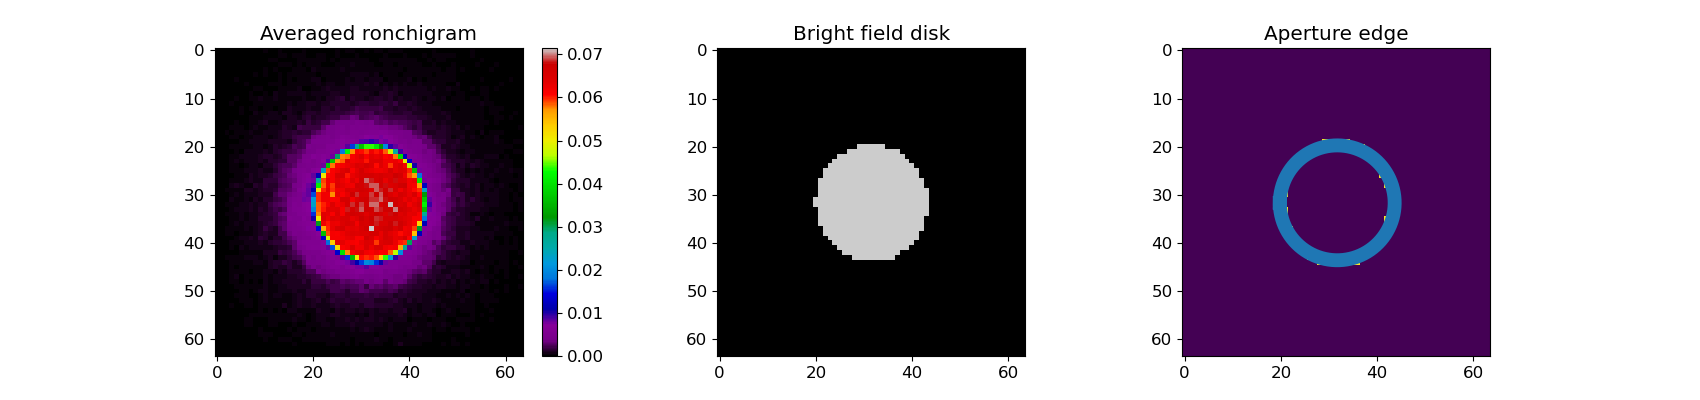

In [7]:
data_4D.plot_aperture()

In [8]:
data_4D.estimate_aperture_size

<bound method Data4D.estimate_aperture_size of <STEM4D.Data4D object at 0x11363ad10>>

In [9]:
data_4D.BFdisk.shape

(64, 64)

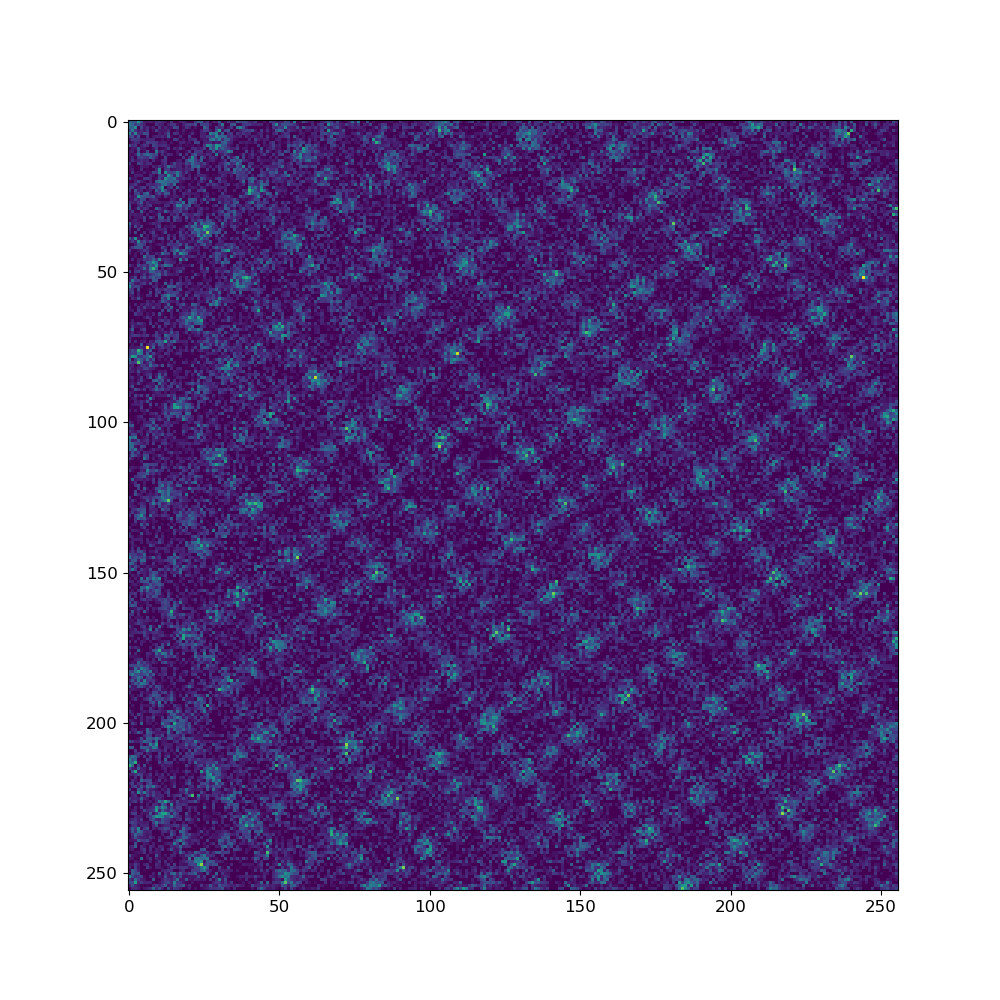

In [10]:
ADF_detector=(1-data_4D.BFdisk)
laadf = np.mean(data_4D.data_4D*ADF_detector,(2,3))

#laadf=laadf[500:800,500:800]
plt.figure(figsize=(10,10))
plt.imshow(laadf)
plt.show()
#plt.savefig("adf.tif")

#from tifffile import imwrite
#imwrite('adf.tif', bf.astype('float32'), imagej=True)

The detector array can be cropped to the size of the BF disk

In [11]:
data_4D.truncate_ronchigram(expansion_ratio=None) # crops ronchigram to the BF disk
# data_4D.center_x/data_4D.aperture_radius

Compute Fourier Transform with respect to the probe position

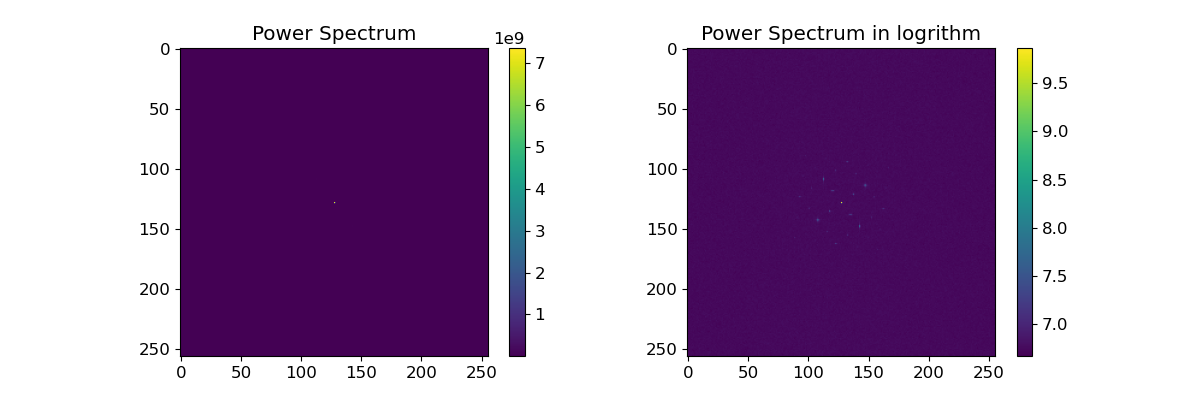

In [12]:
data_4D.apply_FT()
#data_4D.plot_4D_reciprocal(signal = 'amplitude') ## also can use signal = 'phase'
#data_4D.plot_4D_reciprocal(signal='phase')
data_4D.plot_FT()

To pick the trotters with higherst intensities in the power spectrum, it is sometimes convenient to remove artifacts, e.g. vertical or horizontal stripes

In [13]:
##use this to mask the power spectrum
#d = 3
#data_4D.power_spectra[:,int(data_4D.power_spectra.shape[1]/2)-int(d):int(data_4D.power_spectra.shape[1]/2)+int(d)] = 0
#data_4D.power_spectra[int(data_4D.power_spectra.shape[1]/2)-int(d):
                     #int(data_4D.power_spectra.shape[1]/2)+int(d),:] = 0
#data_4D.plot_FT()

Now plot the 9 higherst intensity trotters. Optionally, the first N can be also skipped by using skip = N. We can also manually choose trotters by using selected frames = [[x1,y1],[x2,y2]]. Both, step size and rotation mismatch can be optimized.

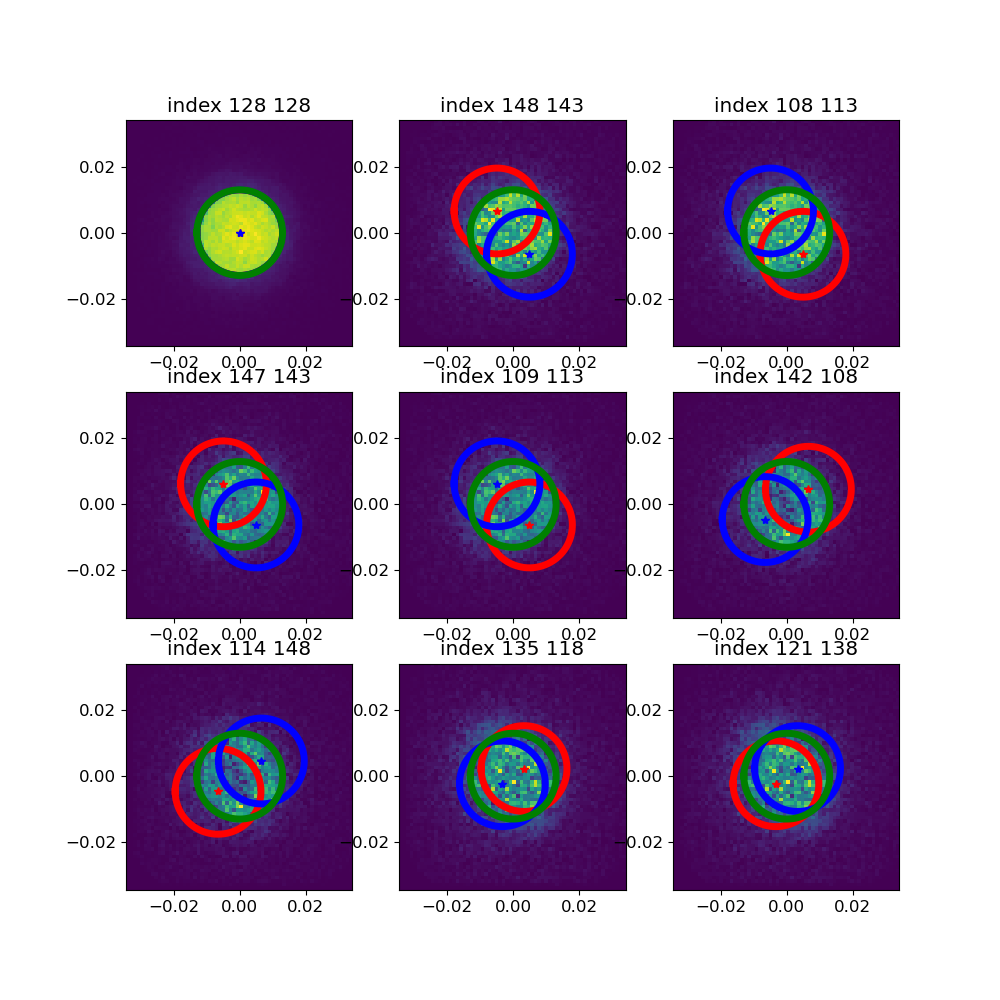

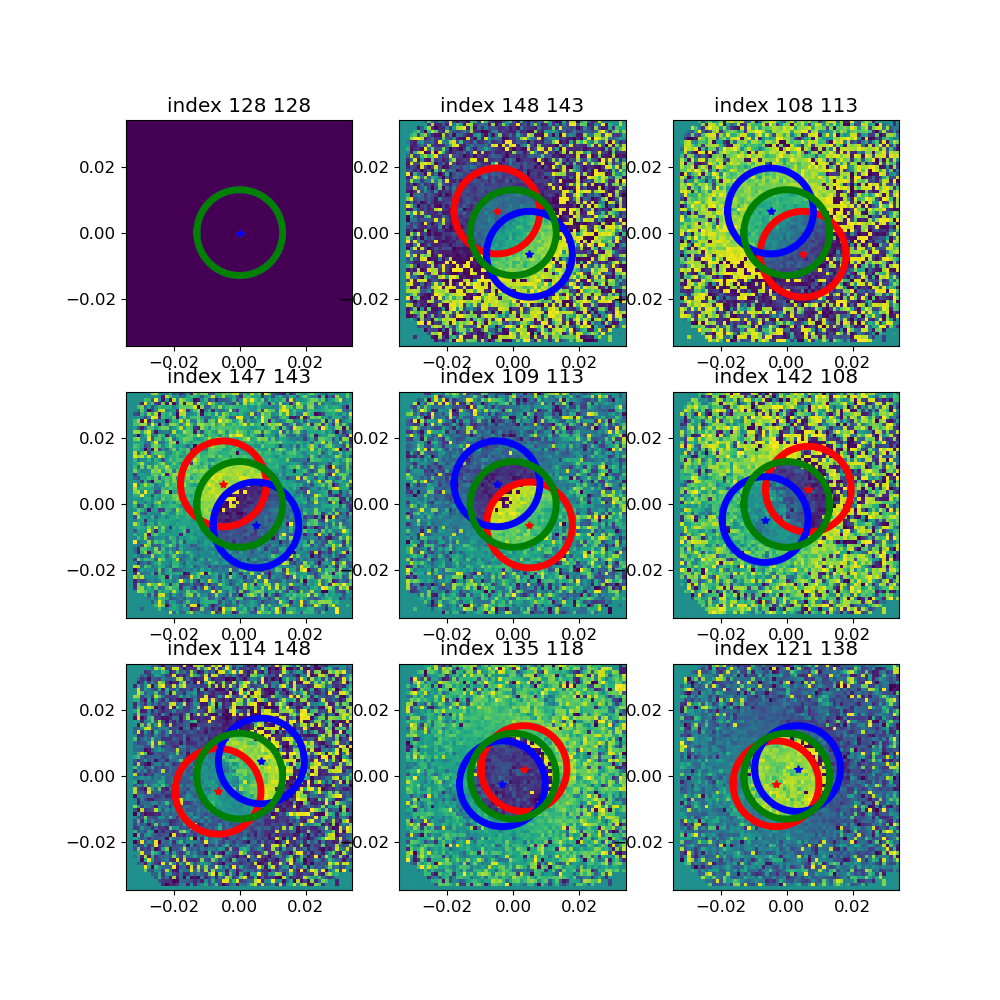

In [14]:
## The step size can be changed here, unit A
#data_4D.step_size = 0.9
data_4D.setup_scanning_parameters()
rotation =180
#data_4D.manually_calibrate_rotation(rotation,plot_constrains=True,skip=0)# value that fits
data_4D.plot_trotters(rotation,plot_constrains=True,skip=0)# value that fits
#data_4D.manually_calibrate_rotation(rotation,plot_constrains=True,skip=0,selected_frames=[[57,68],[57,76],[63,64],[57,60]])


In [15]:
#data_4D.plot_higher_order_trotters(rotation)

When the trotters are located, we can run the SSB algorithm. Although the atomic structure can still be identified, the phase values are incorrect due to aberrations of the probe which can lead to a wrong quantification.

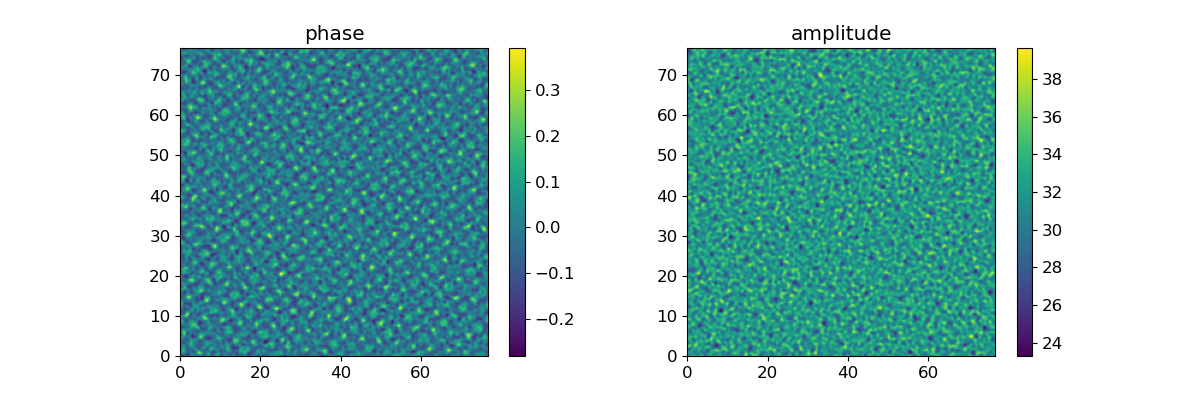

In [16]:
## use this to run SSB without aberration correction
ssb = SSB(data_4D)
ssb.run()
ssb.plot_result()